### Assessment Task 3 (Parts A & B)
A professional data overview, pre-processing, and visualisation report using the World Energy Consumption dataset (2015–2022).

In [2]:
#importing pandas and numpy library to work with dataframes
import pandas as pd
import numpy as np

#Make pandas outputs easier to read in notebooks
pd.set_option("display.max_columns", 100) # show up to 100 columns in outputs
pd.set_option("display.width", 160) # widen console display so tables don’t wrap

# Step 1: Define the path to the reduced CSV you created earlier
# - Keep this in one variable so the path is easy to change later
DATA_PATH = "World Energy Consumption.csv"

# Step 1: Load the dataset with exception handling
# - FileNotFoundError: common mistake if the file path/name is wrong
# - pd.errors.EmptyDataError: handles empty/corrupt CSVs
try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully!")
    print("Shape (rows, columns):", df.shape)
except FileNotFoundError:
    raise SystemExit("Error: File not found. Please check the path and filename.") # graceful exit on missing file
except pd.errors.EmptyDataError:
    raise SystemExit("Error: File is empty. Please provide a valid CSV.") # graceful exit on empty file
except Exception as e:
    raise SystemExit(f"Unexpected error occurred while loading dataset: {e}") # catch-all with details


Dataset loaded successfully!
Shape (rows, columns): (22012, 129)


### Select and rename analysis-ready columns
Focus on a concise feature set and assign human-readable names with units to improve clarity in tables and charts.

In [3]:

#Step 2: Filter dataset to years 2015–2022
filtered_df = df[df['year'].between(2015, 2022)]

#Step 3: Define a reduced set of 23 important columns
# These include identifiers, demographics/economy, electricity demand/generation, and energy source consumption & shares
selected_columns = [
    "country", "year", "iso_code", "population", "gdp",
    "electricity_demand", "electricity_generation", "electricity_share_energy",
    "carbon_intensity_elec",
    "coal_consumption", "coal_share_energy",
    "oil_consumption", "oil_share_energy",
    "gas_consumption", "gas_share_energy",
    "nuclear_consumption", "nuclear_share_energy",
    "hydro_consumption", "hydro_share_energy",
    "solar_consumption", "solar_share_energy",
    "wind_consumption", "wind_share_energy"
]

#Step 4: Keep only those columns that exist in the dataset
# (This avoids errors if some columns are missing)
selected_columns = [c for c in selected_columns if c in filtered_df.columns] # drop any names not present in df

#Create a new DataFrame with only the selected 23 columns
filtered_reduced_df = filtered_df[selected_columns].copy() # make a real copy to avoid warnings

# Step 5: Create a mapping dictionary for column names to more readable names with units
# - This will boosts readability in tables/plots
rename_map = {
    "country": "Country",
    "year": "Year",
    "iso_code": "ISO_Code",
    "population": "Population",
    "gdp": "GDP",
    "electricity_demand": "Electricity_Demand_TWh",
    "electricity_generation": "Electricity_Generation_TWh",
    "electricity_share_energy": "Electricity_Share_of_Energy(%)",
    "carbon_intensity_elec": "Carbon_Intensity_Electricity(gCO2/kWh)",
    "coal_consumption": "Coal_Consumption_TWh",
    "coal_share_energy": "Coal_Share_of_Energy(%)",
    "oil_consumption": "Oil_Consumption_TWh",
    "oil_share_energy": "Oil_Share_of_Energy(%)",
    "gas_consumption": "Gas_Consumption_TWh",
    "gas_share_energy": "Gas_Share_of_Energy(%)",
    "nuclear_consumption": "Nuclear_Consumption_TWh",
    "nuclear_share_energy": "Nuclear_Share_of_Energy(%)",
    "hydro_consumption": "Hydro_Consumption_TWh",
    "hydro_share_energy": "Hydro_Share_of_Energy(%)",
    "solar_consumption": "Solar_Consumption_TWh",
    "solar_share_energy": "Solar_Share_of_Energy(%)",
    "wind_consumption": "Wind_Consumption_TWh",
    "wind_share_energy": "Wind_Share_of_Energy(%)"
}

# Step 6: Apply the renaming in-place (no copy created)
# - This keeps downstream code cleaner and easier to interpret
filtered_reduced_df.rename(columns=rename_map, inplace=True)

#Step 7: Save both the filtered (2015–2022) and reduced (23 columns) version with new column names to a new CSV
filtered_reduced_df.to_csv('filtered_data_2015_2022.csv', index=False)



### Data overview — top and bottom records
Quick visual scan to confirm column selection and ordering look correct.

In [4]:
# Step 1: Show the first 5 rows (sanity check that data loaded correctly)
print("\nTop 5 rows of the dataset:") # label for readability in notebook output
# - head() previews the top of the DataFrame
display(filtered_reduced_df.head())

# Step 2: Show the last 5 rows (helps spot trailing issues or ordering)
print("\nBottom 5 rows of the dataset:") # label for readability in notebook output
# - tail() previews the bottom of the DataFrame
display(filtered_reduced_df.tail())


Top 5 rows of the dataset:


,Country,Year,ISO_Code,Population,GDP,Electricity_Demand_TWh,Electricity_Generation_TWh,Electricity_Share_of_Energy(%),Carbon_Intensity_Electricity(gCO2/kWh),Coal_Consumption_TWh,Coal_Share_of_Energy(%),Oil_Consumption_TWh,Oil_Share_of_Energy(%),Gas_Consumption_TWh,Gas_Share_of_Energy(%),Nuclear_Consumption_TWh,Nuclear_Share_of_Energy(%),Hydro_Consumption_TWh,Hydro_Share_of_Energy(%),Solar_Consumption_TWh,Solar_Share_of_Energy(%),Wind_Consumption_TWh,Wind_Share_of_Energy(%)
15,ASEAN (Ember),2015,NaN,NaN,NaN,888.28,888.28,NaN,534.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,ASEAN (Ember),2016,NaN,NaN,NaN,959.65,959.65,NaN,530.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,ASEAN (Ember),2017,NaN,NaN,NaN,1005.47,1005.47,NaN,515.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,ASEAN (Ember),2018,NaN,NaN,NaN,1064.06,1064.06,NaN,522.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,ASEAN (Ember),2019,NaN,NaN,NaN,1117.11,1117.11,NaN,541.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Bottom 5 rows of the dataset:


,Country,Year,ISO_Code,Population,GDP,Electricity_Demand_TWh,Electricity_Generation_TWh,Electricity_Share_of_Energy(%),Carbon_Intensity_Electricity(gCO2/kWh),Coal_Consumption_TWh,Coal_Share_of_Energy(%),Oil_Consumption_TWh,Oil_Share_of_Energy(%),Gas_Consumption_TWh,Gas_Share_of_Energy(%),Nuclear_Consumption_TWh,Nuclear_Share_of_Energy(%),Hydro_Consumption_TWh,Hydro_Share_of_Energy(%),Solar_Consumption_TWh,Solar_Share_of_Energy(%),Wind_Consumption_TWh,Wind_Share_of_Energy(%)
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,10.21,9.19,NaN,355.822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,9.35,8.24,NaN,387.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,9.57,7.59,NaN,389.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,9.78,8.03,NaN,392.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22011,Zimbabwe,2022,ZWE,16320539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data types and shape
Confirm numeric vs categorical types to guide cleaning and plotting choices.

In [5]:
# Step 1: Print overall shape to report size (#rows, #columns) as required
print("\nDataset Shape:", filtered_reduced_df.shape) # tuple: (n_rows, n_cols)

# Step 2: Print data types per column (critical for spotting wrong types)
# - E.g., numeric columns accidentally stored as 'object'
print("\nColumn Data Types:")
print(filtered_reduced_df.dtypes)


Dataset Shape: (2173, 23)

Column Data Types:
Country                                    object
Year                                        int64
ISO_Code                                   object
Population                                float64
GDP                                       float64
Electricity_Demand_TWh                    float64
Electricity_Generation_TWh                float64
Electricity_Share_of_Energy(%)            float64
Carbon_Intensity_Electricity(gCO2/kWh)    float64
Coal_Consumption_TWh                      float64
Coal_Share_of_Energy(%)                   float64
Oil_Consumption_TWh                       float64
Oil_Share_of_Energy(%)                    float64
Gas_Consumption_TWh                       float64
Gas_Share_of_Energy(%)                    float64
Nuclear_Consumption_TWh                   float64
Nuclear_Share_of_Energy(%)                float64
Hydro_Consumption_TWh                     float64
Hydro_Share_of_Energy(%)                  float64
Sol

In [6]:
#Step 1: Quick counts for reporting
# - These help quantify coverage for countries/years
print("\nColumn count:", filtered_reduced_df.shape[1]) # number of attributes (columns)
print("Row count:", filtered_reduced_df.shape[0])  # number of records (rows)


Column count: 23
Row count: 2173


In [7]:
# Step 1: Uniqueness checks that are often useful when checking data quality
# - number of countries, number of years, and unique (country, year) pairs
print("\nUnique countries:", filtered_reduced_df['Country'].nunique())
print("Unique years:", filtered_reduced_df['Year'].nunique())


Unique countries: 300
Unique years: 8


### Numerical summary statistics
Descriptive statistics for numeric features with an added median to complement the mean.

In [8]:
# Step 1: Build a numerical summary using describe()
# - describe() covers count, mean, std, min, 25%, 50%, 75%, max
numeric_summary = filtered_reduced_df.describe(include=[np.number]).T

# Step 2: We add 'median' column as it is required by referring to numpy median function
numeric_summary["median"] = filtered_reduced_df.median(numeric_only=True)

# Step 3: Display the numerical summary (transpose for rows=features)
print("\nNumerical Summary Statistics:")
display(numeric_summary)



Numerical Summary Statistics:


,count,mean,std,min,25%,50%,75%,max,median
Year,2173.0,2.018233e+03,2.186744e+00,2.015000e+03,2.016000e+03,2.018000e+03,2.020000e+03,2.022000e+03,2.018000e+03
Population,1731.0,1.439286e+08,6.895128e+08,1.871000e+03,1.294326e+06,8.281735e+06,3.290499e+07,7.975105e+09,8.281735e+06
GDP,667.0,1.185659e+12,7.646869e+12,6.533990e+08,3.028261e+10,9.870118e+10,4.371389e+11,1.136302e+14,9.870118e+10
Electricity_Demand_TWh,1756.0,7.570584e+02,2.961872e+03,0.000000e+00,1.617500e+00,1.333500e+01,1.115750e+02,2.852776e+04,1.333500e+01
Electricity_Generation_TWh,1886.0,9.648572e+02,3.248164e+03,0.000000e+00,1.370000e+00,1.714000e+01,1.525375e+02,2.852776e+04,1.714000e+01
Electricity_Share_of_Energy(%),824.0,1.549379e+01,4.249317e+00,1.861000e+00,1.351400e+01,1.591700e+01,1.726875e+01,3.314100e+01,1.591700e+01
Carbon_Intensity_Electricity(gCO2/kWh),1693.0,4.258361e+02,2.058143e+02,0.000000e+00,2.661590e+02,4.666670e+02,5.823390e+02,1.000000e+03,4.666670e+02
Coal_Consumption_TWh,811.0,2.590008e+03,7.853410e+03,0.000000e+00,1.198850e+01,6.331000e+01,5.676795e+02,4.485404e+04,6.331000e+01
Coal_Share_of_Energy(%),739.0,1.671852e+01,1.613647e+01,0.000000e+00,3.828500e+00,1.195300e+01,2.654800e+01,7.328800e+01,1.195300e+01
Oil_Consumption_TWh,824.0,3.043997e+03,7.525457e+03,7.196000e+00,1.143920e+02,3.320325e+02,1.449170e+03,5.351284e+04,3.320325e+02


In [9]:
# Step 1: For categorical columns, show frequency tables (top-10 values)
# - This gives “frequency” as required in instructions
print("\nCategorical Value Frequencies (Top 10):")
cat_cols = [c for c in filtered_reduced_df.columns if filtered_reduced_df[c].dtype == 'object']
for c in cat_cols:
    print(f"\n{c}")
    display(filtered_reduced_df[c].value_counts(dropna=False).head(10).to_frame("count"))


Categorical Value Frequencies (Top 10):

Country


,count
Country,
Zimbabwe,8
ASEAN (Ember),8
Yemen,8
Africa,8
Africa (EI),8
Africa (Ember),8
World,8
Turkmenistan,8
Turkey,8



ISO_Code


,count
ISO_Code,
NaN,532
DZA,8
ARG,8
AGO,8
AUS,8
BRA,8
BLR,8
BEL,8
BGD,8


In [10]:
# Step 1: Count missing values per column to document completeness
# - Sorting desc highlights the columns with most nulls quickly
print("\nMissing Values per Column:")
missing = filtered_reduced_df.isna().sum().sort_values(ascending=False).to_frame("missing_count") #to frame used to assign the name for the column
display(missing)



Missing Values per Column:


,missing_count
Nuclear_Share_of_Energy(%),1682
Nuclear_Consumption_TWh,1674
GDP,1506
Oil_Share_of_Energy(%),1434
Coal_Share_of_Energy(%),1434
Hydro_Share_of_Energy(%),1434
Solar_Share_of_Energy(%),1434
Gas_Share_of_Energy(%),1434
Wind_Share_of_Energy(%),1434
Hydro_Consumption_TWh,1405


In [11]:
# Step 1: Report duplicate records (exact duplicates across all columns)
# - Duplicates can distort statistics and visuals
print("\nDuplicate Rows:", filtered_reduced_df.duplicated().sum())


Duplicate Rows: 0


In [12]:
# Step 1: Identify object columns that might be numeric (stored as text)
print("\nObject columns that may be numeric:")
for col in cat_cols:
    try:
        pd.to_numeric(filtered_reduced_df[col])
        print(f"Column '{col}' can potentially be converted to numeric.")
    except:
        # Not numeric-like, leave as categorical/text
        pass



Object columns that may be numeric:


In [13]:
# Step 1: Sanity check for invalid years (helps catch data entry issues)
if "Year" in filtered_reduced_df.columns:
    invalid_years = filtered_reduced_df[~filtered_reduced_df["Year"].between(1900, 2100)]
    print("\nSuspicious 'Year' values:", invalid_years.shape[0])


Suspicious 'Year' values: 0


### Correlation matrix (numeric features)
Reveal linear relationships to support feature selection and storylines.

In [14]:
# Step 1: Select only numeric columns for correlation analysis
# - Correlation doesn’t apply to categorical/text columns
numeric_df = filtered_reduced_df.select_dtypes(include=[np.number])

# Step 2: Compute Pearson correlation for all numeric pairs
# This reveals linear relationships (e.g., demand vs generation)
corr = numeric_df.corr(numeric_only=True)

# Step 3: Display the correlation matrix
print("\nCorrelation Matrix (numeric columns):")
display(corr)



Correlation Matrix (numeric columns):


,Year,Population,GDP,Electricity_Demand_TWh,Electricity_Generation_TWh,Electricity_Share_of_Energy(%),Carbon_Intensity_Electricity(gCO2/kWh),Coal_Consumption_TWh,Coal_Share_of_Energy(%),Oil_Consumption_TWh,Oil_Share_of_Energy(%),Gas_Consumption_TWh,Gas_Share_of_Energy(%),Nuclear_Consumption_TWh,Nuclear_Share_of_Energy(%),Hydro_Consumption_TWh,Hydro_Share_of_Energy(%),Solar_Consumption_TWh,Solar_Share_of_Energy(%),Wind_Consumption_TWh,Wind_Share_of_Energy(%)
Year,1.000000,0.024841,0.032495,0.030388,0.047160,0.097963,-0.071006,0.002680,-0.051210,-0.000712,-0.068740,0.019277,0.017691,-0.014302,-0.029414,0.009874,0.008272,0.161941,0.380236,0.104130,0.160462
Population,0.024841,1.000000,0.981866,0.926842,0.922044,0.068493,0.043462,0.919953,0.277496,0.891275,-0.136628,0.872276,-0.079871,0.701052,-0.179235,0.906470,-0.054924,0.795122,0.011831,0.804748,-0.052777
GDP,0.032495,0.981866,1.000000,0.993722,0.993626,0.044062,0.040802,0.931376,0.134282,0.997528,-0.068718,0.983345,-0.045455,0.963110,-0.093258,0.974270,-0.037174,0.964147,0.046981,0.982954,-0.006801
Electricity_Demand_TWh,0.030388,0.926842,0.993722,1.000000,0.999995,0.072658,0.020750,0.944998,0.222197,0.983388,-0.130405,0.969515,-0.069470,0.884636,-0.122770,0.978812,-0.054882,0.911078,0.039969,0.949480,-0.019365
Electricity_Generation_TWh,0.047160,0.922044,0.993626,0.999995,1.000000,0.105733,0.020446,0.934156,0.287059,0.981737,-0.175673,0.956526,-0.086108,0.841887,-0.118880,0.976935,-0.080498,0.898560,0.076424,0.934341,-0.002435
Electricity_Share_of_Energy(%),0.097963,0.068493,0.044062,0.072658,0.105733,1.000000,-0.284994,0.098793,0.204108,0.084733,-0.236345,0.080084,-0.484206,0.089307,0.387048,0.091829,0.412549,0.121455,0.255067,0.122072,0.204810
Carbon_Intensity_Electricity(gCO2/kWh),-0.071006,0.043462,0.040802,0.020750,0.020446,-0.284994,1.000000,0.165914,0.654236,0.087134,-0.047569,0.075720,0.137017,0.054450,-0.549548,0.073196,-0.621664,0.073814,-0.021818,0.043651,-0.297331
Coal_Consumption_TWh,0.002680,0.919953,0.931376,0.944998,0.934156,0.098793,0.165914,1.000000,0.405249,0.864215,-0.216268,0.807631,-0.136602,0.606926,-0.163660,0.933717,-0.071441,0.795983,0.050342,0.792214,-0.030584
Coal_Share_of_Energy(%),-0.051210,0.277496,0.134282,0.222197,0.287059,0.204108,0.654236,0.405249,1.000000,0.221951,-0.345597,0.166560,-0.429478,0.059149,-0.167533,0.268717,-0.293677,0.232961,0.099294,0.199893,-0.128312
Oil_Consumption_TWh,-0.000712,0.891275,0.997528,0.983388,0.981737,0.084733,0.087134,0.864215,0.221951,1.000000,-0.130533,0.982696,-0.058935,0.901814,-0.104241,0.948380,-0.089012,0.863798,0.065825,0.925465,-0.002810


### Part A & B: Pre-processing and visualisations
Implement robust cleaning steps and answer targeted questions with clear visuals.

### Missing values and duplicates: strategy
Remove aggregates, coerce numeric-like text, drop critical NaNs, median-impute the rest, and de-duplicate.

In [15]:
# =========================================
# A3 Pre-processing: handle NaNs & duplicates
# =========================================

# Make a working copy (avoid mutating the original dataframe you created earlier)
df = filtered_reduced_df.copy()  # safe copy keeps upstream cells reproducible

# Drop aggregate rows without ISO code (e.g., 'World', regions)
if "ISO_Code" in df.columns:  # guard in case the column got renamed/removed
    before = len(df)  # remember size before filtering for logging
    df = df[df["ISO_Code"].notna()].copy()  # keep only country-level rows with ISO codes
    print(f"Removed aggregates (missing ISO): {before - len(df)} rows | shape: {df.shape}")  # progress message

# Convert numeric-like columns safely (coerce errors to NaN instead of crashing)
num_like = [
    "Population","GDP","Electricity_Demand_TWh","Electricity_Generation_TWh",
    "Electricity_Share_of_Energy(%)","Carbon_Intensity_Electricity(gCO2/kWh)",
    "Coal_Consumption_TWh","Oil_Consumption_TWh","Gas_Consumption_TWh",
    "Nuclear_Consumption_TWh","Hydro_Consumption_TWh","Solar_Consumption_TWh","Wind_Consumption_TWh",
    "Coal_Share_of_Energy(%)","Oil_Share_of_Energy(%)","Gas_Share_of_Energy(%)",
    "Nuclear_Share_of_Energy(%)","Hydro_Share_of_Energy(%)","Solar_Share_of_Energy(%)","Wind_Share_of_Energy(%)"
]  # list of intended numeric columns used later in analysis/plots
num_like = [c for c in num_like if c in df.columns]  # keep only columns that actually exist in df
df[num_like] = df[num_like].apply(pd.to_numeric, errors="coerce")  # coerce bad strings like '—' to NaN

# Remove exact duplicate rows (protect stats/plots from double counting)
before = len(df)  # save size before dedup
df = df.drop_duplicates()  # drop perfect duplicates across all columns
print(f"Duplicates removed: {before - len(df)} | shape: {df.shape}")  # log how many removed

# Drop rows missing CRITICAL columns (must-have features for our business questions)
critical = [c for c in ["Electricity_Demand_TWh","Electricity_Generation_TWh",
                        "Carbon_Intensity_Electricity(gCO2/kWh)","Population"] if c in df.columns]  # build list safely
before = len(df)  # track size pre-drop
df = df.dropna(subset=critical)  # remove records that are unusable for core analysis
print(f"Dropped rows with NaN in {critical}: {before - len(df)} | shape: {df.shape}")  # log impact

# Fill remaining numeric NaNs with the column median (simple, robust imputation)
for c in num_like:  # iterate over all numeric-like columns
    if c not in critical:  # we already enforced non-null for critical columns
        df[c] = df[c].fillna(df[c].median())  # median is stable against outliers

print("Preprocessing done (NaNs + duplicates).")  # checkpoint banner


Removed aggregates (missing ISO): 532 rows | shape: (1641, 23)
Duplicates removed: 0 | shape: (1641, 23)
Dropped rows with NaN in ['Electricity_Demand_TWh', 'Electricity_Generation_TWh', 'Carbon_Intensity_Electricity(gCO2/kWh)', 'Population']: 128 | shape: (1513, 23)
Preprocessing done (NaNs + duplicates).


In [16]:
# Convert selected numeric-like columns into proper numeric dtypes
# Some datasets may store values as strings or contain placeholders like '—' or 'NaN'
# Using errors='coerce' ensures any invalid entries are safely converted into NaN.

numeric_cols = [
    "GDP", "Electricity_Demand_TWh", "Electricity_Generation_TWh",
    "Carbon_Intensity_Electricity(gCO2/kWh)",
    "Coal_Consumption_TWh", "Oil_Consumption_TWh", "Gas_Consumption_TWh",
    "Solar_Consumption_TWh", "Wind_Consumption_TWh", "Hydro_Consumption_TWh"
]

# Only apply to columns that exist in df
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Display dtypes after conversion (to confirm everything is numeric now)
df[numeric_cols].dtypes



GDP                                       float64
Electricity_Demand_TWh                    float64
Electricity_Generation_TWh                float64
Carbon_Intensity_Electricity(gCO2/kWh)    float64
Coal_Consumption_TWh                      float64
Oil_Consumption_TWh                       float64
Gas_Consumption_TWh                       float64
Solar_Consumption_TWh                     float64
Wind_Consumption_TWh                      float64
Hydro_Consumption_TWh                     float64
dtype: object

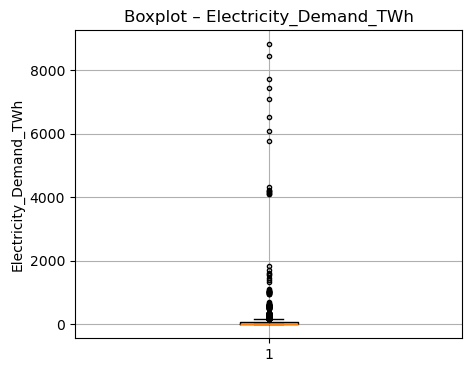

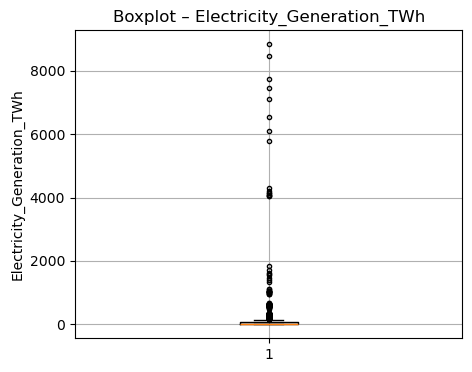

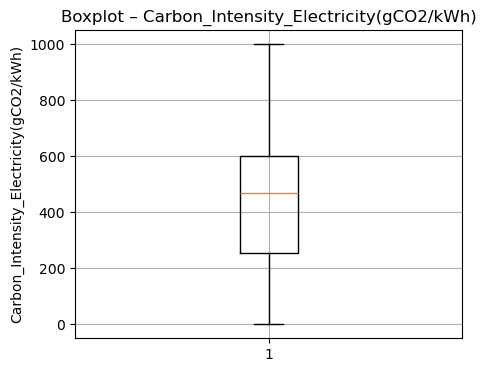

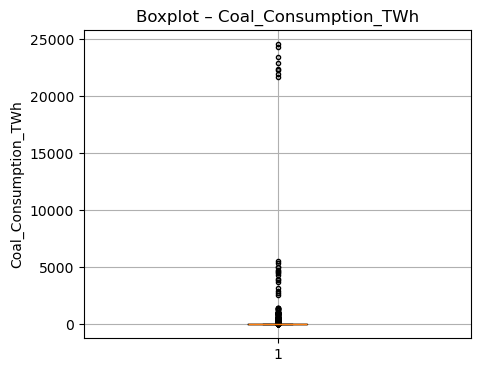

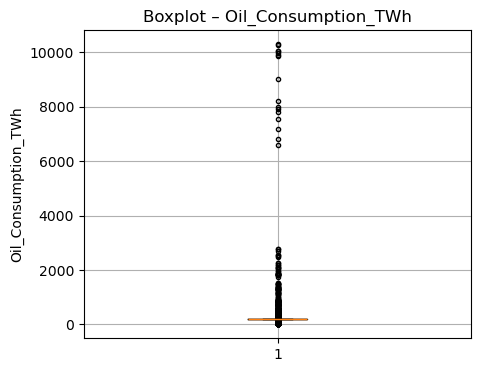

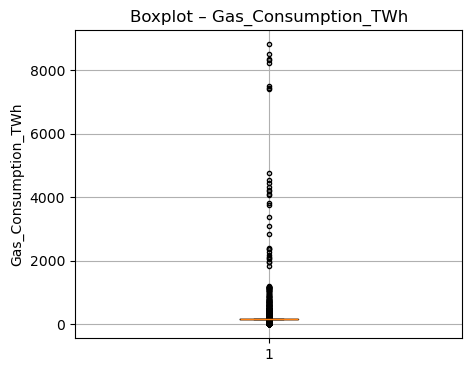

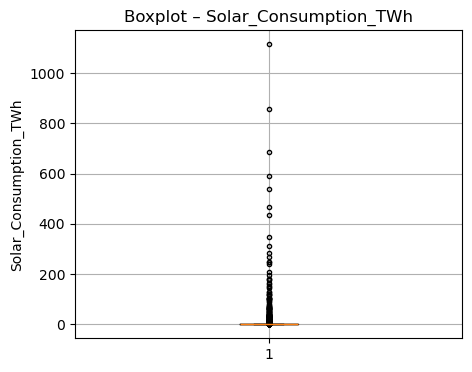

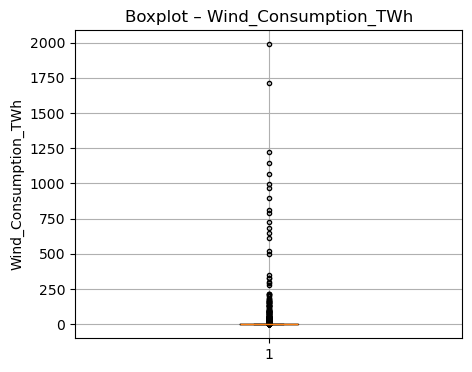

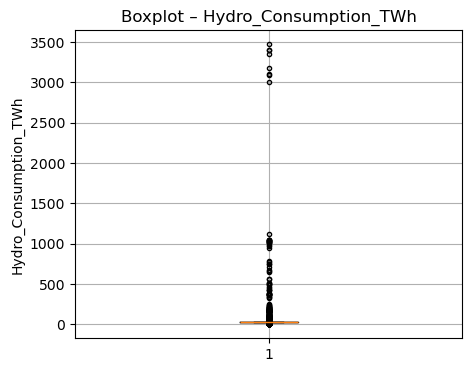

In [17]:
### Outlier inspection (boxplots)
#Visually flag extreme values to inform optional capping.
import matplotlib.pyplot as plt  # plotting library (note: no seaborn per instructions)

# Choose numeric columns where outliers matter most for our story
cols_to_inspect = [
    "Electricity_Demand_TWh","Electricity_Generation_TWh","Carbon_Intensity_Electricity(gCO2/kWh)",
    "Coal_Consumption_TWh","Oil_Consumption_TWh","Gas_Consumption_TWh",
    "Solar_Consumption_TWh","Wind_Consumption_TWh","Hydro_Consumption_TWh"
]  # balanced set: demand, generation, emissions intensity, and source consumptions
cols_to_inspect = [c for c in cols_to_inspect if c in df.columns]  # keep only present columns

# Draw a compact boxplot for each selected variable (visual scan for outliers)
for c in cols_to_inspect:  # loop through variables for inspection
    plt.figure(figsize=(5,4))  # small, readable figure size per plot
    plt.boxplot(df[c].dropna(), vert=True, sym=".")  # '.' shows outliers as small dots; dropna to avoid empty warnings
    plt.title(f"Boxplot – {c}")  # informative title
    plt.ylabel(c)  # y-axis matches variable name/units already embedded
    plt.grid(True)  # light grid for readability
    plt.show()  # render plot


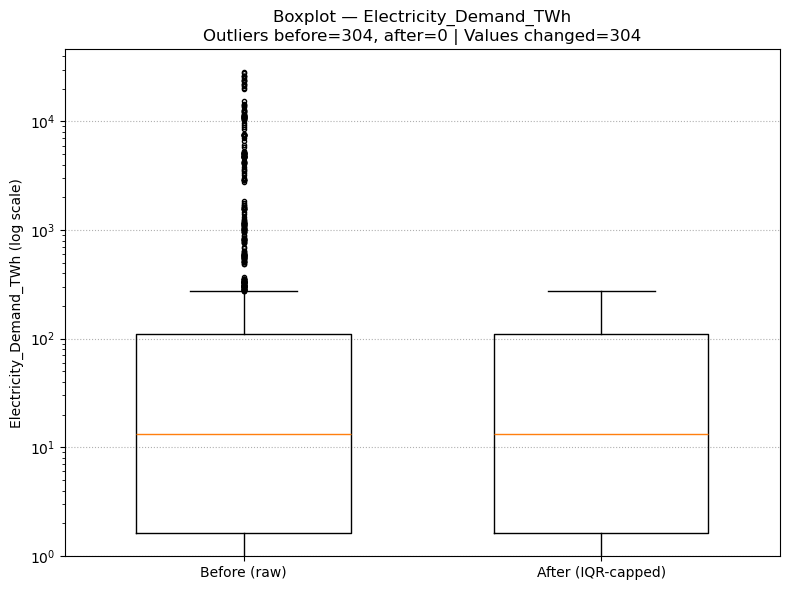

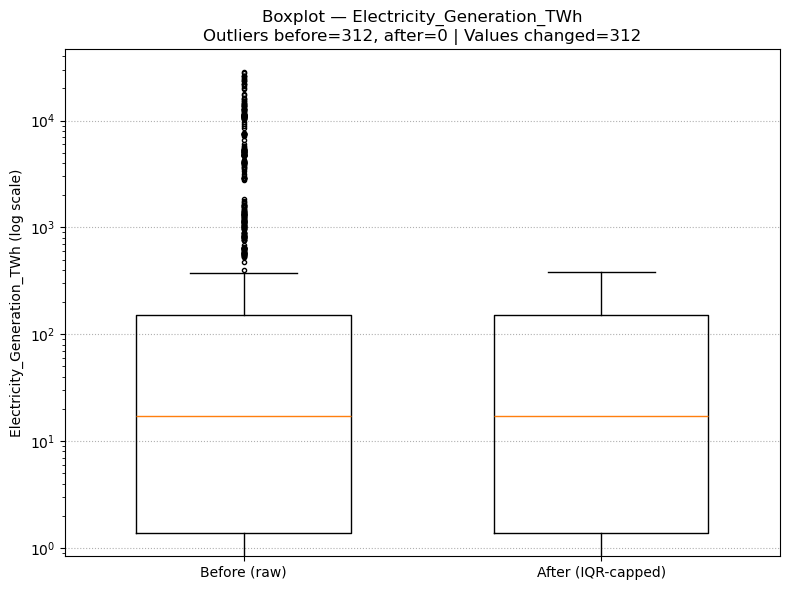

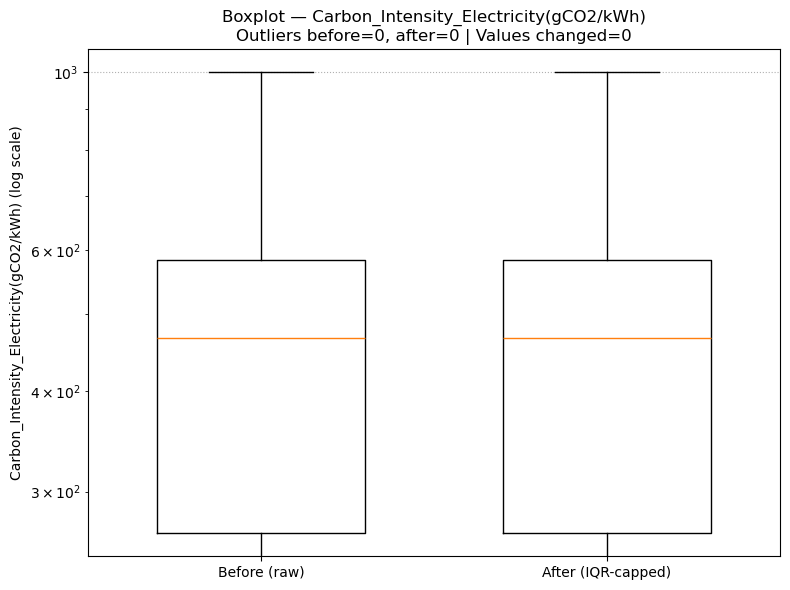

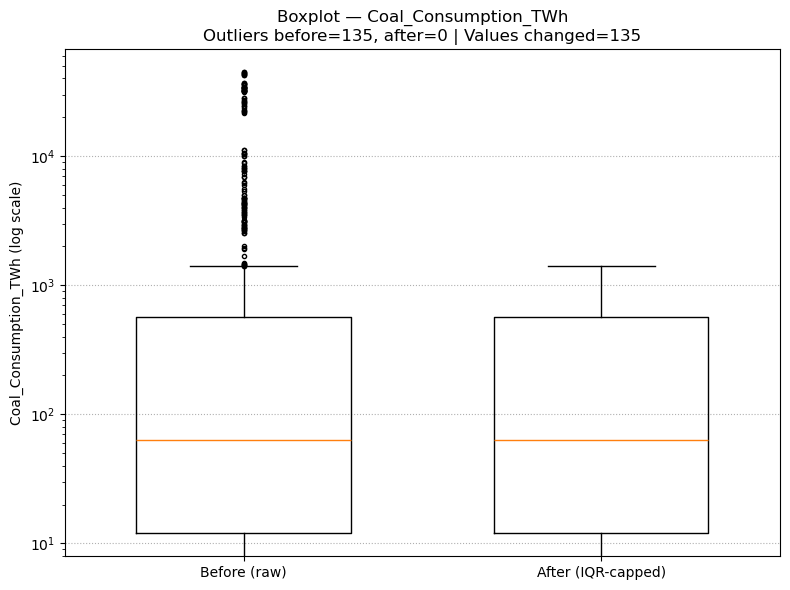

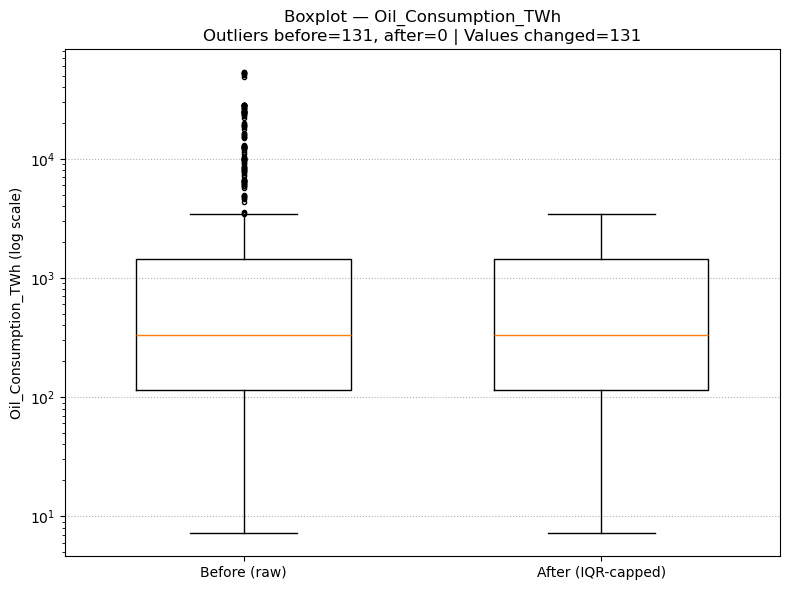

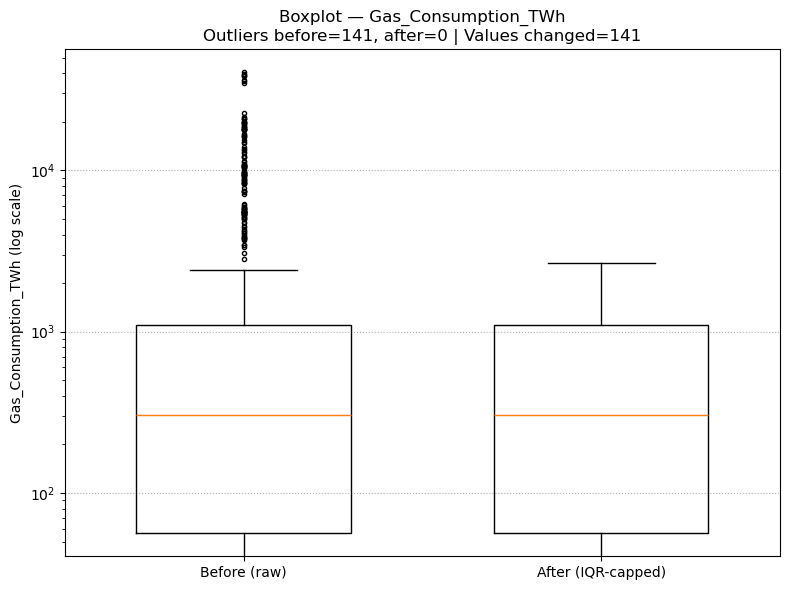

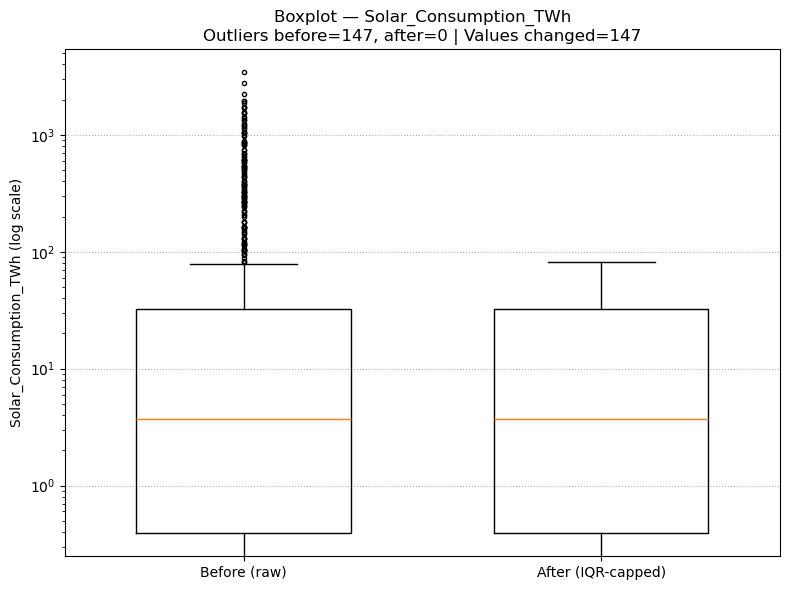

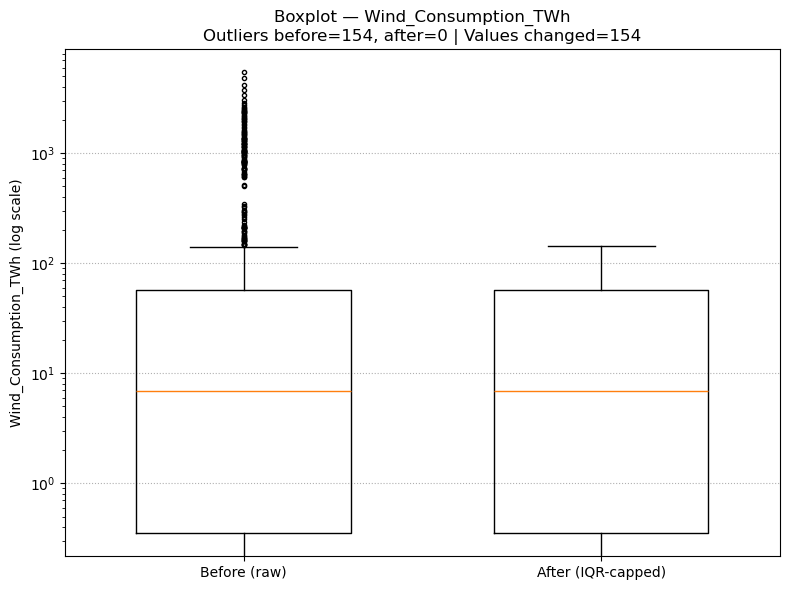

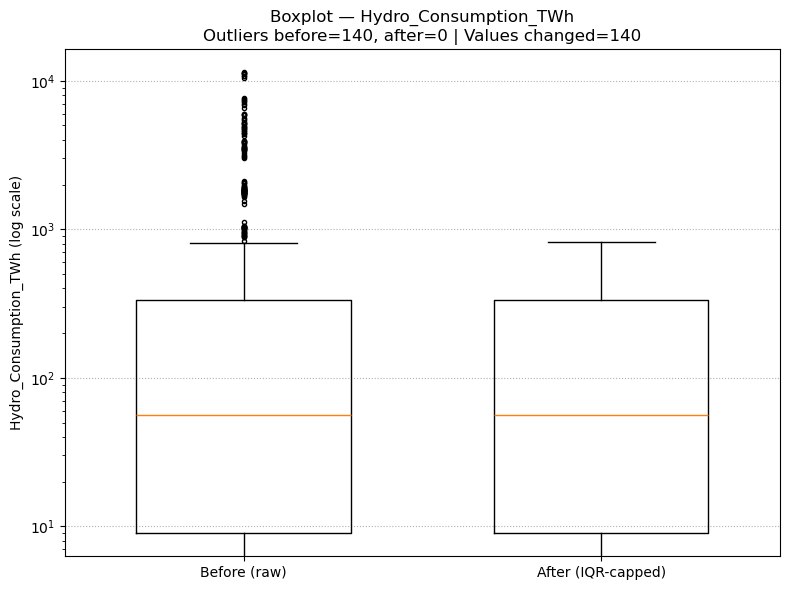

,column,outliers_before,outliers_after,values_changed,pct_changed
1,Electricity_Generation_TWh,312,0,312,16.54
0,Electricity_Demand_TWh,304,0,304,17.31
7,Wind_Consumption_TWh,154,0,154,18.69
6,Solar_Consumption_TWh,147,0,147,17.84
5,Gas_Consumption_TWh,141,0,141,17.62
8,Hydro_Consumption_TWh,140,0,140,18.23
3,Coal_Consumption_TWh,135,0,135,16.65
4,Oil_Consumption_TWh,131,0,131,15.90
2,Carbon_Intensity_Electricity(gCO2/kWh),0,0,0,0.00


In [18]:
# ============================================================
# Outlier Handling with Tukey's IQR Fences
# ------------------------------------------------------------
# Goal: Compare "Before (raw)" vs "After (IQR-capped)" using 
#       consistent Tukey fences, with clear boxplots + audit table.
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# Step 1: Choose numeric columns for inspection
# ---------------------------------------------
cols_to_inspect = [
    "Electricity_Demand_TWh","Electricity_Generation_TWh","Carbon_Intensity_Electricity(gCO2/kWh)",
    "Coal_Consumption_TWh","Oil_Consumption_TWh","Gas_Consumption_TWh",
    "Solar_Consumption_TWh","Wind_Consumption_TWh","Hydro_Consumption_TWh"
]
cols_to_inspect = [c for c in cols_to_inspect if c in filtered_reduced_df.columns]

# ---------------------------------------------
# Step 2: Extract BEFORE data (raw values)
# ---------------------------------------------
before = filtered_reduced_df[cols_to_inspect].apply(pd.to_numeric, errors="coerce")

# ---------------------------------------------
# Step 3: Define Tukey-based capping function
# ---------------------------------------------
def cap_to_tukey_fences(df_in: pd.DataFrame, k: float = 1.5) -> pd.DataFrame:
    """
    Cap each numeric column at Tukey's lower/upper fences:
    [Q1 - k*IQR, Q3 + k*IQR].
    Ensures all AFTER values lie within these fences.
    """
    out = df_in.copy()
    for c in out.columns:
        s = df_in[c].dropna()
        if s.empty:
            continue
        q1, q3 = s.quantile(0.25), s.quantile(0.75)
        iqr = q3 - q1
        lo, hi = q1 - k * iqr, q3 + k * iqr
        out[c] = df_in[c].clip(lower=lo, upper=hi)
    return out

# AFTER dataset with capped values
after = cap_to_tukey_fences(before, k=1.5)

# ---------------------------------------------
# Step 4: Helpers to compute fences & outlier counts
# ---------------------------------------------
def tukey_bounds(s: pd.Series, k: float = 1.5):
    """Return (lower, upper) Tukey fences for a given series."""
    s = s.dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return (q1 - k*iqr, q3 + k*iqr)

def count_outside(s: pd.Series, lo: float, hi: float) -> int:
    """Count how many values fall outside given [lo, hi] bounds."""
    s = s.dropna()
    return int(((s < lo) | (s > hi)).sum())

# ---------------------------------------------
# Step 5: Loop through columns → plot & audit
# ---------------------------------------------
# Build an audit (how many outliers before/after, and how many values changed),
# and show side‑by‑side boxplots on a log scale for each column.
audit = []

for col in cols_to_inspect:
    before_series = before[col].dropna()
    after_series = after[col].dropna()

    if before_series.empty:
        continue  # nothing to compare for this column

    # Tukey fences computed from the BEFORE distribution
    lo, hi = tukey_bounds(before_series)
    outliers_before = count_outside(before_series, lo, hi)
    outliers_after = count_outside(after_series, lo, hi)

    # Count how many values actually changed due to capping
    aligned = pd.concat([before[col], after[col]], axis=1, keys=["before", "after"]).dropna()
    changed_count = int((aligned["before"] != aligned["after"]).sum())
    changed_pct = (changed_count / len(aligned) * 100) if len(aligned) else 0.0

    audit.append({
        "column": col,
        "outliers_before": outliers_before,
        "outliers_after": outliers_after,
        "values_changed": changed_count,
        "pct_changed": round(changed_pct, 2),
    })

    # Boxplots (Before vs After) on log scale
    plt.figure(figsize=(8, 6))
    plt.boxplot(
        [before_series, after_series],
        tick_labels=["Before (raw)", "After (IQR-capped)"],
        sym=".", widths=0.6, vert=True
    )
    plt.yscale("log")
    plt.title(
        f"Boxplot — {col}\n"
        f"Outliers before={outliers_before}, after={outliers_after} | "
        f"Values changed={changed_count}"
    )
    plt.ylabel(f"{col} (log scale)")
    plt.grid(True, axis="y", linestyle=":")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# Step 6: Display audit table for summary
# ---------------------------------------------
audit_df = pd.DataFrame(audit).sort_values(["outliers_before"], ascending=False)
display(audit_df)


In [19]:
# =========================================
# Feature Engineering: per-capita + energy shares
# =========================================
import numpy as np  # numerical helpers (e.g., inf handling)

# Demand per person in MWh (TWh * 1e6 / people) — fairer cross-country comparisons
if {"Population","Electricity_Demand_TWh"}.issubset(df.columns):  # ensure required inputs exist
    df["Demand_per_capita_MWh"] = (
        df["Electricity_Demand_TWh"] * 1e6 / df["Population"]  # unit conversion TWh→MWh, then divide by population
    ).replace([np.inf,-np.inf], np.nan).fillna(0)  # guard against division by zero and fill remaining gaps

# Generation per person in MWh (optional, parallel to demand per capita)
if {"Population","Electricity_Generation_TWh"}.issubset(df.columns):  # guard for columns
    df["Generation_per_capita_MWh"] = (
        df["Electricity_Generation_TWh"] * 1e6 / df["Population"]  # same idea as above for generation
    ).replace([np.inf,-np.inf], np.nan).fillna(0)  # clean up impossible values

# Identify share columns by suffix pattern (already renamed with units earlier)
share_cols = [c for c in df.columns if c.endswith("_Share_of_Energy(%)")]  # programmatic selection of share %
fossil_cols = [c for c in share_cols if c.startswith(("Coal","Oil","Gas"))]  # fossil fuel-based shares
renew_cols  = [c for c in share_cols if c.startswith(("Hydro","Solar","Wind"))]  # renewable-based shares

# Aggregate fossil & renewable shares (simple sums; shares already in %)
df["Fossil_Share_%"]    = df[fossil_cols].sum(axis=1, min_count=1) if fossil_cols else np.nan  # NaN if none present
df["Renewable_Share_%"] = df[renew_cols].sum(axis=1,  min_count=1) if renew_cols  else np.nan  # NaN if none present

print("Feature engineering added.")  # checkpoint banner


# Show a sample of new columns alongside key identifiers for easy screenshot
cols_to_preview = [
    "Country", "Year", 
    "Demand_per_capita_MWh", "Generation_per_capita_MWh", 
    "Fossil_Share_%", "Renewable_Share_%"
]

# Only keep the columns that exist in your df
cols_to_preview = [c for c in cols_to_preview if c in df.columns]

display(df[cols_to_preview].head())


Feature engineering added.


,Country,Year,Demand_per_capita_MWh,Generation_per_capita_MWh,Fossil_Share_%,Renewable_Share_%
138,Afghanistan,2015,0.146948,0.034959,69.4035,5.795
139,Afghanistan,2016,0.159948,0.034935,69.4035,5.795
140,Afghanistan,2017,0.164967,0.035631,69.4035,5.795
141,Afghanistan,2018,0.167908,0.031892,69.4035,5.795
142,Afghanistan,2019,0.158329,0.028330,69.4035,5.795


### Q1. Did the world generate enough power to meet demand from 2015 to 2022?
We’ll add up global demand and generation each year to see how closely they track. Look for years where the lines pull apart—that’s a hint of oversupply or potential shortfalls.

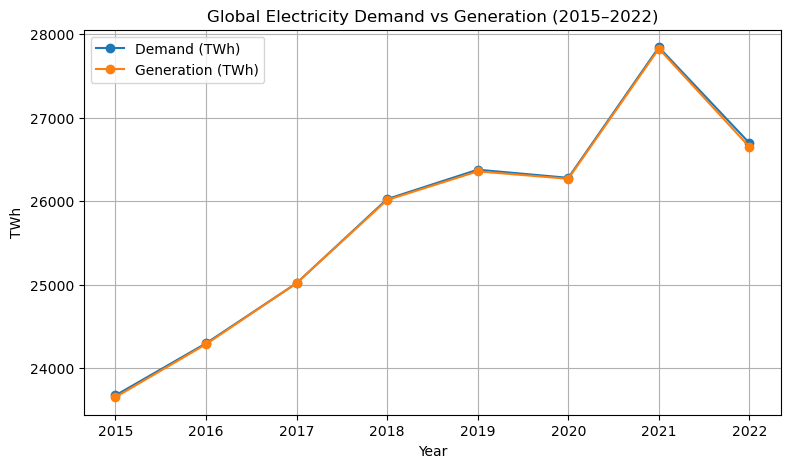

In [20]:
# =========================================
# Q1 — Global Electricity Demand vs Generation (2015–2022)
# =========================================

# Aggregate to world totals by year (sum across countries)
agg = df.groupby("Year")[["Electricity_Demand_TWh","Electricity_Generation_TWh"]].sum(min_count=1)  # min_count keeps NaN-safe sums

# Plot both series on the same axes for comparison
plt.figure(figsize=(9,5))  # readable size without clutter
plt.plot(agg.index, agg["Electricity_Demand_TWh"], marker="o", label="Demand (TWh)")  # demand trend line
plt.plot(agg.index, agg["Electricity_Generation_TWh"], marker="o", label="Generation (TWh)")  # generation trend line
plt.title("Global Electricity Demand vs Generation (2015–2022)")  # informative title with period
plt.xlabel("Year")  # time axis
plt.ylabel("TWh")  # energy unit
plt.grid(True)  # add grid for value reading
plt.legend()  # show legend for the two lines
plt.show()  # render


### Q2. Do higher renewable shares actually cut carbon intensity across countries?
We’ll plot renewable share against carbon intensity, add a best‑fit line, and report the correlation to quantify the relationship.

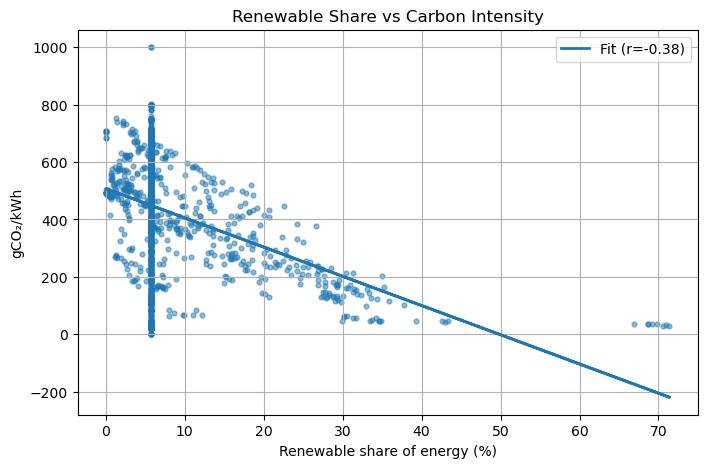

In [21]:
x = df["Renewable_Share_%"]; y = df["Carbon_Intensity_Electricity(gCO2/kWh)"]
mask = x.notna() & y.notna()
r = np.corrcoef(x[mask], y[mask])[0,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=12, alpha=0.5)
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask]+b, linewidth=2, label=f"Fit (r={r:.2f})")
plt.title("Renewable Share vs Carbon Intensity")
plt.xlabel("Renewable share of energy (%)"); plt.ylabel("gCO₂/kWh")
plt.grid(True); plt.legend(); plt.show()


### Q3. Do larger economies use more electricity?
We’ll relate GDP to electricity demand using a scatter, fit a trend line, and show the correlation to capture the big‑picture link.

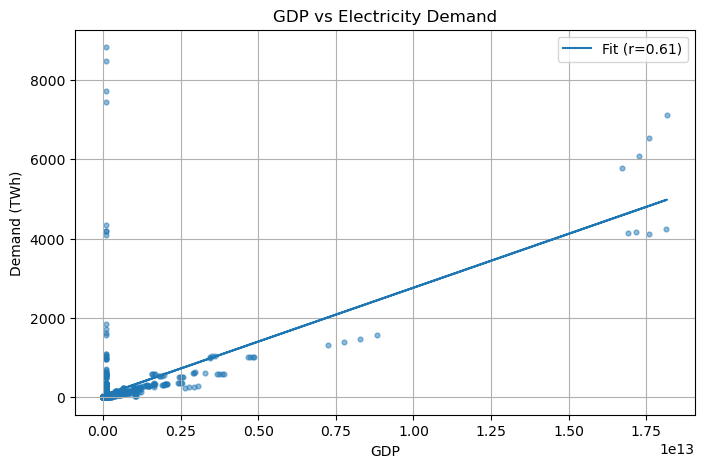

In [22]:
x = df["GDP"]; y = df["Electricity_Demand_TWh"]
mask = x.notna() & y.notna()
r = np.corrcoef(x[mask], y[mask])[0,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=12, alpha=0.5)
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask]+b, label=f"Fit (r={r:.2f})")
plt.title("GDP vs Electricity Demand")
plt.xlabel("GDP"); plt.ylabel("Demand (TWh)")
plt.grid(True); plt.legend(); plt.show()


### Q4. What did Australia’s electricity mix look like in 2022?
We’ll show a simple bar chart of energy shares to compare renewables versus fossil fuels for Australia in 2022.

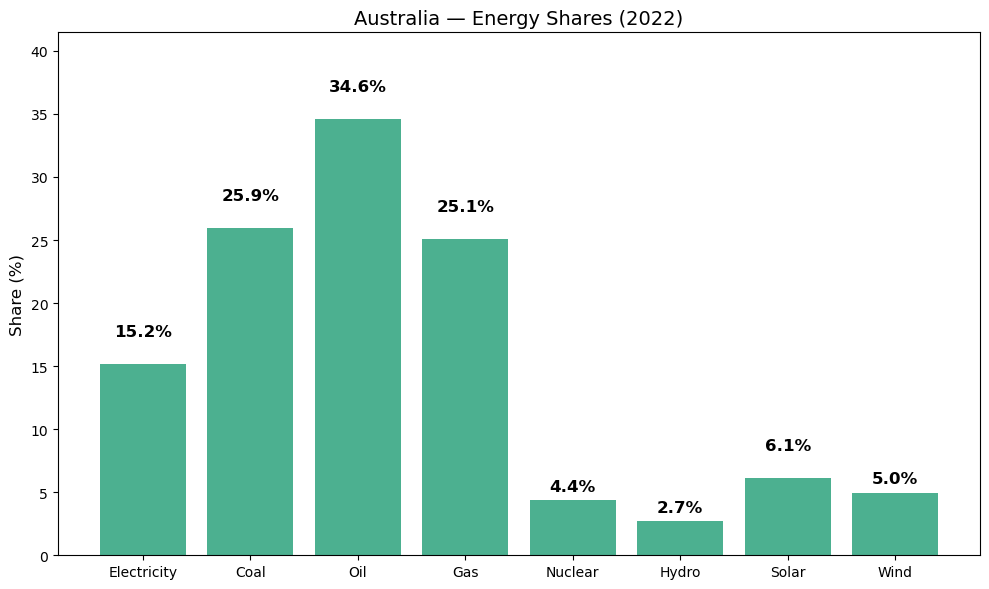

In [23]:
# =========================================
# Q6 — Energy Mix for a Australia (2022)
# =========================================

country = "Australia"  # <- change as needed to focus on another country of interest
row = df[(df["Country"] == country) & (df["Year"] == 2022)].tail(1)  # take the most recent row if multiple entries

# Prepare labels and values
mix_cols = [c for c in share_cols if c in df.columns]  # ensure share columns exist in df
labels = [c.replace("_Share_of_Energy(%)","") for c in mix_cols]  # cleaner labels: strip suffix
values = [row[c].iloc[0] if len(row) else np.nan for c in mix_cols]  # safe extraction without FutureWarning

# Bar chart of energy shares with clear labels and readable defaults
fig, ax = plt.subplots(figsize=(10, 6))  # balanced aspect ratio

bars = ax.bar(range(len(values)), values, color="#4CB090")

ax.set_title(f"{country} — Energy Shares (2022)", fontsize=14)
ax.set_ylabel("Share (%)", fontsize=12)
ax.set_xticks(range(len(labels)), labels, rotation=0, fontsize=10)

plt.tight_layout()

# Add percentage labels above each bar (skip missing values)
for bar, pct in zip(bars, values):
    if np.isnan(pct):
        continue
    x_center = bar.get_x() + bar.get_width() / 2
    y_top = bar.get_height()
    label_offset = 0.5 if pct < 5 else 2  # keep small bars readable
    ax.text(
        x_center,
        y_top + label_offset,
        f"{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="black",
    )

# Leave headroom for the labels
valid_max = max(v for v in values if not np.isnan(v)) if any(not np.isnan(v) for v in values) else 0
ax.set_ylim(0, valid_max * 1.2 if valid_max > 0 else 1)

plt.show()



### Q5. How did the world’s power mix change from 2015 to 2022?
We’ll use a stacked area chart to show how the shares of fossil fuels, nuclear, and renewables evolved—and which sources gained or lost ground.

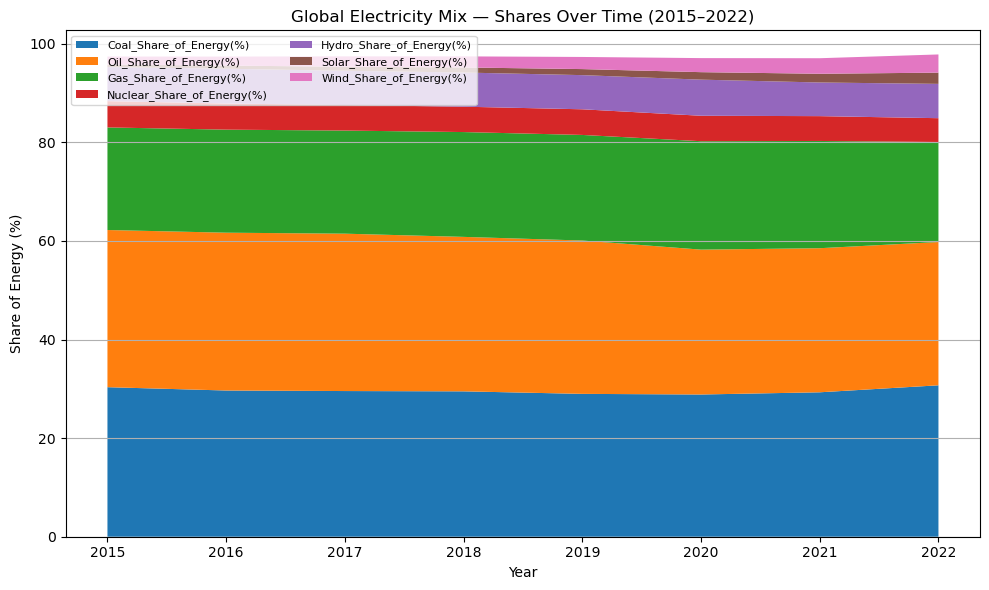

In [24]:
# =========================================
# Q7 — Global energy mix over time (stacked area)
# =========================================
import numpy as np  # re-import is harmless; keeps cell self-contained
import matplotlib.pyplot as plt  # ditto for clarity

# Pick share columns that exist (fossil + nuclear + major renewables)
mix_cols = [c for c in [
    "Coal_Share_of_Energy(%)","Oil_Share_of_Energy(%)","Gas_Share_of_Energy(%)",
    "Nuclear_Share_of_Energy(%)","Hydro_Share_of_Energy(%)",
    "Solar_Share_of_Energy(%)","Wind_Share_of_Energy(%)"
] if c in df.columns]  # build list defensively

# Aggregate to global average share by year
# Prefer demand-weighted averages so years/countries with more electricity count more
# Compute global average mix by year.
# If demand is available, use it as weights; otherwise fall back to a simple mean.
def compute_global_mix(df, mix_cols):
    has_weights = "Electricity_Demand_TWh" in df.columns
    grouped = df.groupby("Year", group_keys=False)  # one row per year in the result
    result = {}

    if has_weights:
        wcol = "Electricity_Demand_TWh"
        def weighted_mean(g, col):
            mask = g[col].notna() & g[wcol].notna()
            if not mask.any():
                return np.nan
            return np.average(g.loc[mask, col], weights=g.loc[mask, wcol])
        for col in mix_cols:
            result[col] = grouped.apply(lambda g: weighted_mean(g, col), include_groups=False)
    else:
        for col in mix_cols:
            result[col] = grouped[col].mean()

    return pd.DataFrame(result).sort_index()

mix_df = compute_global_mix(df, mix_cols)

# Finalize inputs for stackplot
mix_df = mix_df.dropna(how="all")  # drop years with all shares missing
years = mix_df.index.values  # x-values for time axis
series_list = [mix_df[c].fillna(0).values for c in mix_cols]  # fill NaNs with 0 to preserve stacking

# Draw stacked area chart to visualize composition shift
plt.figure(figsize=(10,6))  # give the stack space to breathe
plt.stackplot(years, series_list, labels=mix_cols)
plt.title("Global Electricity Mix — Shares Over Time (2015–2022)")
plt.xlabel("Year")
plt.ylabel("Share of Energy (%)")
plt.legend(loc="upper left", ncol=2, fontsize=8)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


### Q6. Which countries decarbonised most effectively from 2015 to 2022?
We’ll compare countries by how much they grew renewables and cut carbon intensity, while factoring in changes in demand using bubble sizes.

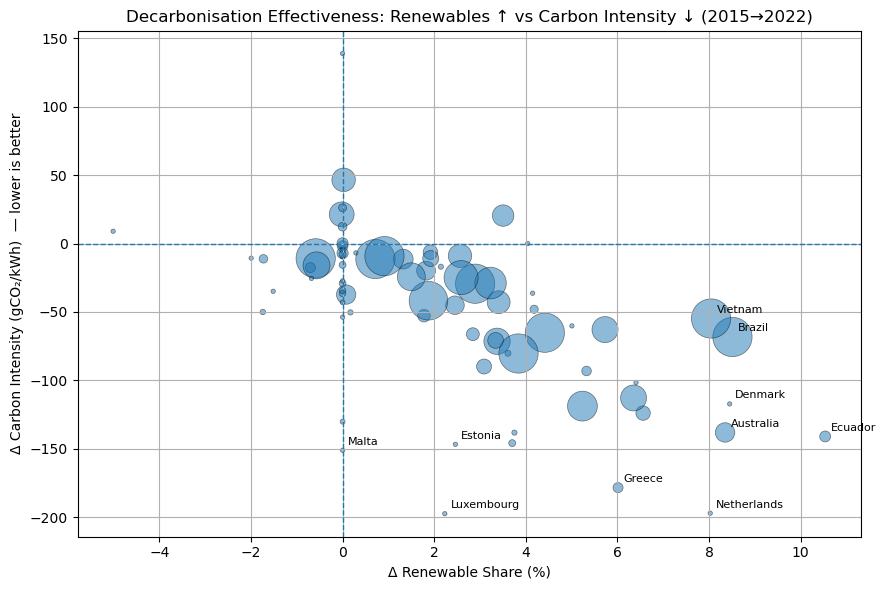

In [25]:
# =========================================
# Q8 — Decarbonisation effectiveness (bubble chart)
# x: change in Renewable_Share_% (2022 - 2015)
# y: change in Carbon Intensity (2022 - 2015) — negative is good
# size: change in Electricity_Demand_TWh (scaled bubble size)
# =========================================
import numpy as np  # numeric helpers
import matplotlib.pyplot as plt  # plotting

# Keep only the columns required for this view
req_cols = ["Country","Year","Renewable_Share_%","Carbon_Intensity_Electricity(gCO2/kWh)","Electricity_Demand_TWh"]  # needed fields
req_cols = [c for c in req_cols if c in df.columns]  # guard for missing columns
tmp = df[req_cols].copy()  # work on a safe copy

# Create a country-indexed pivot with 2015 and 2022 side by side
piv = tmp.pivot_table(
    index="Country",  # one row per country
    columns="Year",   # two columns: 2015 and 2022
    values=["Renewable_Share_%","Carbon_Intensity_Electricity(gCO2/kWh)","Electricity_Demand_TWh"],
    aggfunc="mean"    # average if multiple entries per (country,year)
)  # result is a multiindex columns frame

# Only proceed if both 2015 and 2022 exist in the pivot columns
if (2015 in piv.columns.levels[1]) and (2022 in piv.columns.levels[1]):  # check multiindex level for years
    dRenew = piv["Renewable_Share_%"][2022] - piv["Renewable_Share_%"][2015]  # change in renewable share (%)
    dCI    = piv["Carbon_Intensity_Electricity(gCO2/kWh)"][2022] - piv["Carbon_Intensity_Electricity(gCO2/kWh)"][2015]  # change in CI (gCO2/kWh)
    dDem   = piv["Electricity_Demand_TWh"][2022] - piv["Electricity_Demand_TWh"][2015]  # change in demand (TWh)

    eff = pd.DataFrame({
        "dRenew_%": dRenew,  # x-axis variable
        "dCarbonIntensity": dCI,  # y-axis variable (negative is good)
        "dDemand_TWh": dDem  # bubble size basis
    }).dropna()  # drop incomplete rows

    # Bubble size: scale by absolute demand change and clip to keep bubbles readable
    size = eff["dDemand_TWh"].abs().fillna(0)  # absolute change in demand
    size = (size / (size.quantile(0.9) if size.quantile(0.9) > 0 else 1.0)) * 800  # scale to 0–800 range robustly
    size = size.clip(10, 800)  # enforce min/max bubble size

    # Draw the scatter with quadrant lines
    plt.figure(figsize=(9,6))  # enough room for labels
    plt.scatter(eff["dRenew_%"], eff["dCarbonIntensity"], s=size, alpha=0.5, edgecolors="black", linewidths=0.5)  # bubbles
    plt.axhline(0, linestyle="--", linewidth=1)  # horizontal ref: no CI change
    plt.axvline(0, linestyle="--", linewidth=1)  # vertical ref: no renewable change
    plt.title("Decarbonisation Effectiveness: Renewables ↑ vs Carbon Intensity ↓ (2015→2022)")  # narrative title
    plt.xlabel("Δ Renewable Share (%)")  # x-axis label
    plt.ylabel("Δ Carbon Intensity (gCO₂/kWh)  — lower is better")  # y-axis label (directional hint)

    # Label a few interesting countries: biggest renewable gains and biggest CI drops
    top_gain = eff.nlargest(5, "dRenew_%")  # top +ve renewable changes
    top_drop = eff.nsmallest(5, "dCarbonIntensity")  # most negative CI changes
    to_label = pd.concat([top_gain, top_drop]).drop_duplicates()  # union without duplicates
    for country_name, row in to_label.iterrows():  # annotate selected points
        plt.annotate(country_name, (row["dRenew_%"], row["dCarbonIntensity"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)  # small offset so text doesn't sit on the marker

    plt.grid(True)  # readability
    plt.tight_layout()  # tidy layout
    plt.show()  # render
else:
    print("Not enough coverage for 2015 and 2022 across required columns to compute this view.")  # guard message


### Q7. What does the GDP–demand landscape look like, and where is carbon intensity higher?
We’ll use a hexbin plot on log–log axes (GDP vs electricity demand), coloring bins by average carbon intensity to spot hot‑ and cool‑spots.


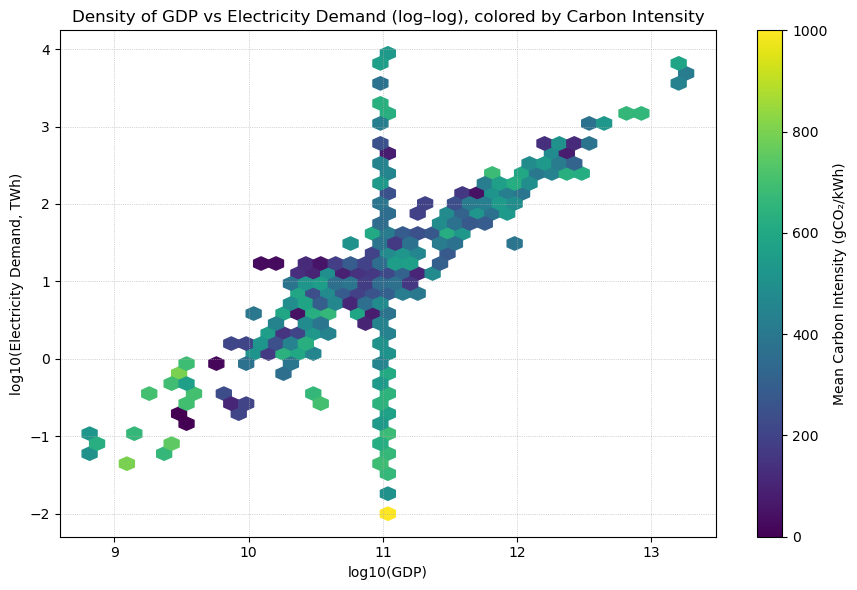

In [26]:
# =========================================
# Q9 — Hexbin density: GDP vs Electricity Demand (log–log),
#       colored by mean Carbon Intensity
# =========================================
import numpy as np  # numeric tools
import matplotlib.pyplot as plt  # plotting

# Prepare vectors for the plot
x = df["GDP"]  # economic output
y = df["Electricity_Demand_TWh"]  # electricity demand
c = df["Carbon_Intensity_Electricity(gCO2/kWh)"]  # coloring variable

# Mask to keep only valid, strictly positive values (log requires > 0)
mask = x.notna() & y.notna() & c.notna() & (x > 0) & (y > 0)  # build boolean filter
x_log = np.log10(x[mask])  # log-transform GDP for scale compression
y_log = np.log10(y[mask])  # log-transform demand for scale compression
c_vals = c[mask]  # color values aligned to masked points

# Draw a hexbin plot (binned density) to avoid overplotting on large datasets
plt.figure(figsize=(9,6))  # larger to make bins readable
hb = plt.hexbin(
    x_log, y_log,  # log–log positions
    C=c_vals,  # color is the mean carbon intensity in each hex
    reduce_C_function=np.mean,  # aggregate color per bin by mean
    gridsize=40,  # number of hexes along x-axis (controls resolution)
    cmap="viridis"  # perceptually uniform colormap
)  # returns mappable for colorbar
cb = plt.colorbar(hb, label="Mean Carbon Intensity (gCO₂/kWh)")  # attach colorbar with label
plt.title("Density of GDP vs Electricity Demand (log–log), colored by Carbon Intensity")  # analytic title
plt.xlabel("log10(GDP)")  # x label noting transform
plt.ylabel("log10(Electricity Demand, TWh)")  # y label noting transform
plt.grid(True, linestyle=":", linewidth=0.5)  # subtle grid
plt.tight_layout()  # tidy margins
plt.show()  # render

# (Interpretation hint for your report)
# Higher GDP generally aligns with higher demand; color gradient suggests cleaner systems in some high-demand clusters.


### Q8. Which countries improved their renewable‑share ranking from 2015 to 2022?
We’ll compare country ranks side‑by‑side to see who moved up or down and by how much, with renewable percentages shown for context.


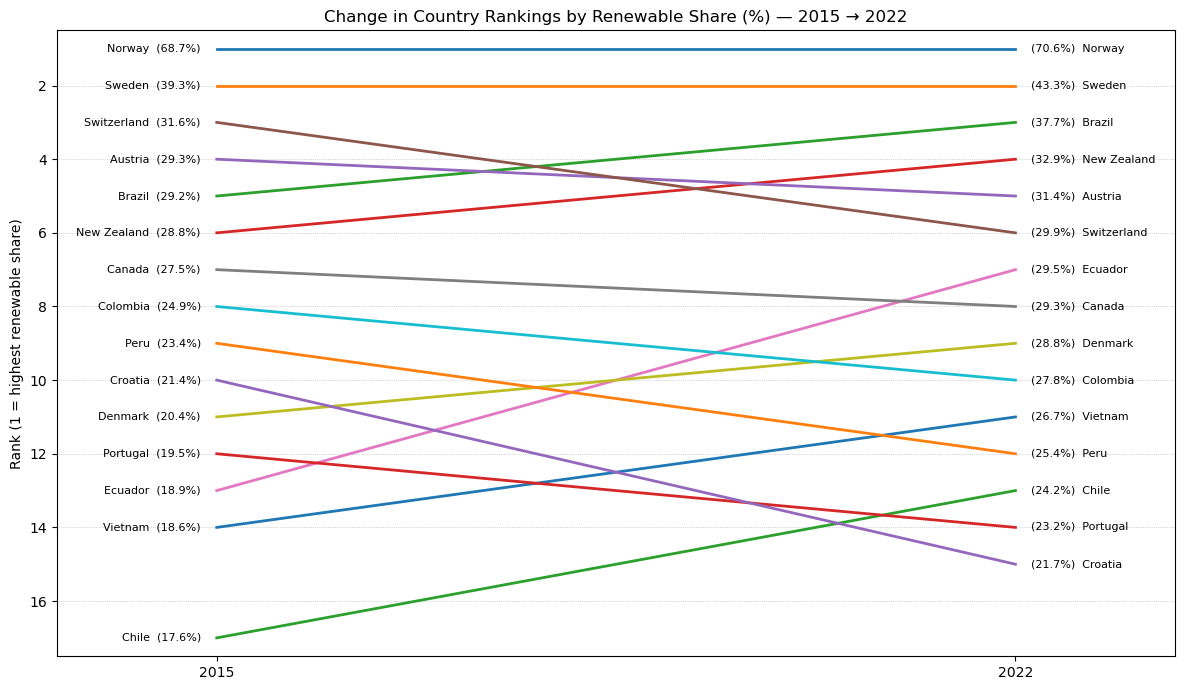

In [29]:
# =========================================
# Q10 — Slopegraph: Country ranking by Renewable Share (%) from 2015 to 2022
# =========================================
import numpy as np  # numeric helpers
import matplotlib.pyplot as plt  # plotting
import pandas as pd  # data manip

# Ensure we have a composite renewable-share column (sum of Hydro/Solar/Wind shares)
# Create a single "Renewable_Share_%" column by summing Hydro/Solar/Wind shares (if not already present).
# This keeps things simple when you just want one renewables number per row.
if "Renewable_Share_%" not in df.columns:
    # Find all share (%) columns, then pick out the renewable ones
    share_cols = [c for c in df.columns if c.endswith("_Share_of_Energy(%)")]
    renew_cols = [c for c in share_cols if c.startswith(("Hydro", "Solar", "Wind"))]

    if renew_cols:
        # Sum the available renewable shares; min_count=1 keeps rows as NaN if all components are missing
        df["Renewable_Share_%"] = df[renew_cols].sum(axis=1, min_count=1)
    else:
        # If none of the component columns exist, create the column as NaN so downstream code won't break
        df["Renewable_Share_%"] = np.nan # sum % across components

start_year, end_year = 2015, 2022  # endpoints for comparison

# Aggregate to one renewable-share value per country per year (mean if multiple rows)
base = (df[df["Year"].isin([start_year, end_year])]  # keep only endpoints
        .groupby(["Country","Year"], as_index=False)["Renewable_Share_%"]
        .mean())  # average renewable share (%)

# Pivot so each country has two columns: start_year and end_year
piv = base.pivot(index="Country", columns="Year", values="Renewable_Share_%")  # wide format per country

# Keep countries that have both years present (complete cases)
piv = piv.dropna(subset=[start_year, end_year])  # drop incomplete comparisons

# Build rankings where 1 = highest renewable share (ranked within each year)
rank_start = piv[start_year].rank(ascending=False, method="min")  # ranks at start year
rank_end   = piv[end_year].rank(ascending=False, method="min")  # ranks at end year

# Combine ranks and actual values for labeling
ranks = pd.DataFrame({
    "Country": piv.index,  # country names
    "rank_start": rank_start.values,  # numeric rank at start
    "rank_end": rank_end.values,  # numeric rank at end
    "val_start": piv[start_year].values,  # renewable % at start
    "val_end": piv[end_year].values  # renewable % at end
}).set_index("Country")  # country as index

# Focus on the top 15 by 2022 rank to keep the slopegraph readable
topN = ranks.sort_values("rank_end").head(15)  # best-ranked countries at end_year

# Draw slopegraph: two x positions (start vs end), y = rank (inverted so 1 is at the top)
plt.figure(figsize=(12,7))  # allow room for labels

# Draw slope lines and readable labels for start/end years
start_x, end_x = 0, 1
left_margin, right_margin = 0.02, 0.02

for country, data in topN.iterrows():
    start_rank = data["rank_start"]
    end_rank = data["rank_end"]

    # Line showing rank change
    plt.plot([start_x, end_x], [start_rank, end_rank], linewidth=2)

    # Left label: country + start-year value
    left_label = f"{country}  ({data['val_start']:.1f}%)"
    plt.text(
        start_x - left_margin, start_rank,
        left_label,
        ha="right", va="center", fontsize=8
    )

    # Right label: end-year value + country
    right_label = f"({data['val_end']:.1f}%)  {country}"
    plt.text(
        end_x + right_margin, end_rank,
        right_label,
        ha="left", va="center", fontsize=8
    )

# Styling axes for slopegraph readability
plt.title(f"Change in Country Rankings by Renewable Share (%) — {start_year} → {end_year}")  # title with years
plt.xlim(-0.2, 1.2)  # leave margins for labels
plt.ylim(0.5, topN[["rank_start","rank_end"]].values.max() + 0.5)  # dynamic y-range based on ranks present
plt.xticks([start_x, end_x], [str(start_year), str(end_year)])  # show only the two years on x-axis
plt.gca().invert_yaxis()  # rank 1 at the top (more intuitive)
plt.grid(axis="y", linestyle=":", linewidth=0.5)  # light horizontal gridlines help follow lines
plt.ylabel("Rank (1 = highest renewable share)")  # clarify inverted axis meaning
plt.tight_layout()  # trim whitespace
plt.show()  # render

# Report writing tip:
# Lines moving upward (left→right) indicate improved position; downward lines imply relative decline.
